# Imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Open, convert, and save image as bmp

In [3]:
#filename_to_convert = 'mini_smiley.jpg'
#img_to_convert = cv2.imread(filename_to_convert)
#cv2.imwrite('mini_smiley.bmp', img_to_convert)

# Load Image

image shape: (100, 100, 3)


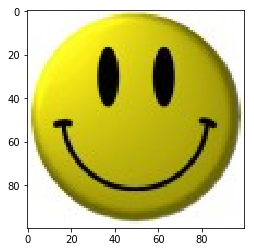

In [4]:
filename = 'mini_smiley.jpg'
img = cv2.imread(filename)
print('image shape: ' + str(img.shape))
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Convert to Grayscale

gray image shape: (100, 100)


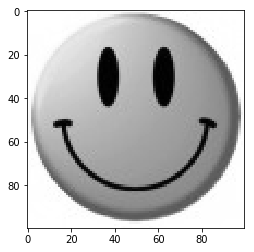

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('gray image shape: ' + str(img_gray.shape))
imgplot = plt.imshow(img_gray, cmap='gray')

# Image Gradiants - Sobel

In [15]:
#BORDER_CONSTANT is zero padding
#ddepth CV_16S is 16 bit 

ddepth = cv2.CV_16S
scale = 1
delta = 0
grad_x = cv2.Sobel(img_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_CONSTANT)

grad_y = cv2.Sobel(img_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_CONSTANT)
print("Sobel x: " + str(grad_x[:10]))

# Check whether Sobel uses Scharr for 3x3 Matrix -- It does not!
#grad_x_scharr = cv2.Scharr(img_gray, ddepth, 1, 0, scale=scale, delta=delta, borderType=cv2.BORDER_CONSTANT)
#print(np.array_equal(grad_x, grad_x_scharr))

Sobel x: [[  765     0     0     0     0     0     0    -3    -3     0     0     0
      0     0     0    -2    -2     3     3    -2    -1    -1    -3    -1
      1     3     3     0     2     3    -3    -8    -7     1     4     3
      4    -1    -4    -8    -4    -1   -17   -19    -9    -6    -6    -3
     -2    -3     0     0    -7     5    26    24    16    10     4    -1
     -4     0     3    -1     0     8     2    -3     0    -5    -1     0
      5     8    -5    -6     0     3    -3     0     5     0     0     0
      0     0     3     1    -3    -1     0     3     3     0     0    -3
     -3     0     0  -762]
 [ 1020     0     0     0     0     0     0    -3    -3     0     0     0
      0     0     0    -1    -1     2     2     0    -1    -3    -4    -2
      3     3     2     0     1     4    -2   -13    -9     6     2    -4
     -4   -15   -20   -29   -26   -22   -45   -45   -25   -17   -19   -13
    -10   -12   -11   -19   -22    10    47    42    31    39    43    46
  

In [7]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

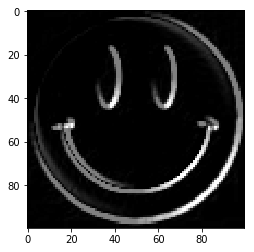

In [8]:
imgplot = plt.imshow(grad, cmap='gray')

# Structure Tensor

In [16]:
Ixx = grad_x**2
Ixy = grad_x*grad_y
Iyy = grad_y**2

# Harris Response Calculation

In [20]:
# R = det(M)-k*tr(M)^2
k = 0.04

det = (Ixx * Iyy) - (Ixy**2)
trace = Ixx + Iyy
r = det - k*(trace**2)

r.shape

(100, 100)

# OpenCV Harris to compare

In [46]:
dst = cv2.cornerHarris(img_gray,2,3,0.04)
np.array_equal(r, dst)

False

In [47]:
print(r[10])
print(dst[10])

[-1.02928e+03 -1.02400e+01 -1.02400e+01 -1.02400e+01 -1.02400e+01
 -1.02400e+01 -1.02400e+01 -4.00000e+00  0.00000e+00 -1.60000e+01
 -4.00000e+00 -1.60000e-01 -2.56000e+00 -1.60000e-01 -1.60000e-01
 -2.19040e+02 -1.00000e+02 -6.40000e-01 -1.15712e+03  1.18384e+03
 -5.72320e+02  8.90880e+02 -1.05120e+02 -5.83680e+02 -4.62400e+01
 -4.62400e+01 -7.39840e+02 -1.60000e+01 -3.48800e+02 -2.46400e+02
 -8.21920e+02 -7.50240e+02  8.52320e+02 -6.41600e+01 -6.78400e+02
  1.99040e+02 -1.13808e+03  1.14032e+03 -1.26736e+03 -4.62400e+01
 -1.08160e+02 -1.02400e+03 -1.02400e+03 -6.76000e+02 -4.32640e+02
 -3.24000e+02 -2.56000e+02 -1.02400e+03 -1.02400e+03 -2.56000e+02
 -5.38240e+02 -5.38240e+02 -3.24000e+02 -1.15600e+03 -8.29440e+02
 -8.29440e+02 -8.29440e+02 -5.95360e+02 -8.76160e+02 -2.68960e+02
 -5.95360e+02  1.11600e+03  1.21440e+02  6.73120e+02  8.23680e+02
 -1.12400e+03  2.94240e+02  2.21280e+02 -9.24160e+02 -6.60640e+02
 -1.01136e+03 -7.17440e+02 -9.24160e+02 -4.19840e+02  6.15520e+02
 -9.79360e

# Dilate to remove noise (not used)

In [48]:
#r_dilated = cv2.dilate(r,None)

# Non-maximum Suppression - Threshold

Number of corners:4820


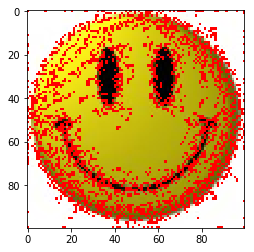

In [51]:
# Threshold
corners = np.argwhere(r>0.01*r.max())
print('Number of corners:' + str(corners.size) )

# Show image:
img_harris1 = img.copy()
img_harris1[r>0.01*r.max()]=[0,0,255]
imgplot = plt.imshow(cv2.cvtColor(img_harris1, cv2.COLOR_BGR2RGB))

# Non-maximum Suppression - Threshold

Shape of filtered coords array: (34, 2)


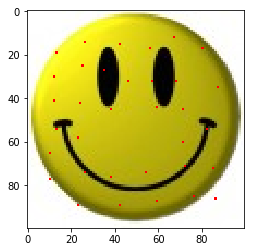

In [53]:
min_distance = 10
candidate_values = [r[c[0]][c[1]] for c in corners]

#sort candidates
index = np.argsort(candidate_values)

#store allowed point locations in array
allowed_locations = np.zeros(r.shape)
allowed_locations[min_distance:-min_distance,min_distance:-min_distance] = 1

#select the best points taking min_distance into account
filtered_coords = []
for i in index:
    if allowed_locations[corners[i][0]][corners[i][1]] == 1:
        filtered_coords.append(corners[i])
        allowed_locations[(corners[i][0]-min_distance):(corners[i][0]+min_distance),
            (corners[i][1]-min_distance):(corners[i][1]+min_distance)] = 0
print('Shape of filtered coords array: ' + str(np.array(filtered_coords).shape))

# Show image:
img_harris2 = img.copy()
for c in filtered_coords:
    img_harris2[c[0]][c[1]]=[0,0,255]
imgplot = plt.imshow(cv2.cvtColor(img_harris2, cv2.COLOR_BGR2RGB))